In [90]:
#importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from scipy import stats
import pylab
from mlxtend.feature_selection import sequential_feature_selector as SFS

In [2]:
#importing the dataset

data = pd.read_csv('./train.csv')

In [3]:
data.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [4]:
data.shape

(50882, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [6]:
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
data['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [8]:
data['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [9]:
#since data['Health Indicator'] is a encoded value, it does not have much relation with other columns, 
#so it might a good idea to drop it later on

In [11]:
data['City_Code'].nunique()

36

In [10]:
data[data['Holding_Policy_Duration'].isna()]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
10,11,C28,600,Owned,Individual,21,21,No,X2,NaN,NaN,21,4068.0,1
13,14,C5,900,Rented,Individual,20,20,No,X2,NaN,NaN,18,8364.0,0
15,16,C3,1484,Rented,Individual,20,20,No,X3,NaN,NaN,2,4912.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50863,50864,C1,3705,Owned,Individual,75,75,No,X3,NaN,NaN,16,17850.0,1
50864,50865,C27,3469,Owned,Individual,72,72,No,X4,NaN,NaN,2,17312.0,0
50865,50866,C21,4915,Owned,Individual,74,74,No,NaN,NaN,NaN,14,19944.0,0
50867,50868,C6,2040,Owned,Individual,37,37,No,X2,NaN,NaN,20,10016.0,0


In [12]:
data['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [13]:
#It may be because the people might not have any existing policy with the company for 
#which the rows of this two columns are null, so filling them with zeros

data['Holding_Policy_Duration'].fillna("0.0", inplace=True)
data['Holding_Policy_Type'].fillna(0, inplace=True)

In [15]:
#Expolatory Data Analysis

data['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

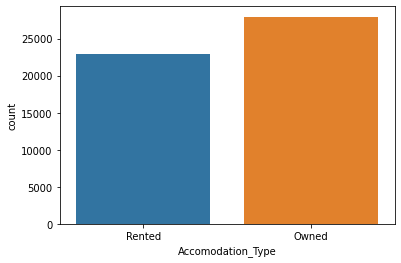

In [16]:
sns.countplot(data=data, x='Accomodation_Type')

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

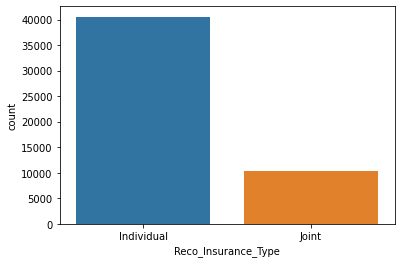

In [17]:
sns.countplot(data=data, x='Reco_Insurance_Type')

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

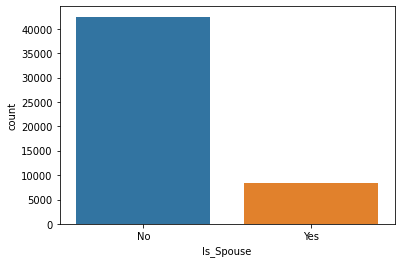

In [18]:
sns.countplot(data=data, x='Is_Spouse')

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

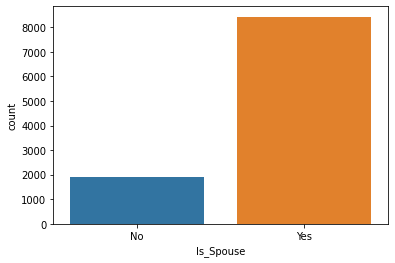

In [19]:
sns.countplot(data=data[data['Reco_Insurance_Type']=='Joint'], x='Is_Spouse')

In [20]:
data['Holding_Policy_Duration'].unique()

array(['14+', '0.0', '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [21]:
data['Reco_Policy_Cat'].unique()

array([22, 19, 16, 17,  1, 18, 21, 13, 20,  9,  2,  4, 12,  6, 14, 11,  3,
        8,  7, 10, 15,  5], dtype=int64)

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

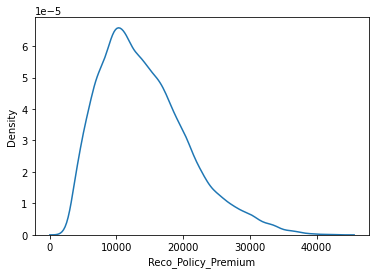

In [22]:
sns.kdeplot(data['Reco_Policy_Premium'])

In [23]:
#to deal with skewness, certain methods are defined

def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
def log_master(data,col):
    data = data[data[col]>0]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
def reciprocal_master(data,col):
    data = data[data[col]>0]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    

def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))

C:\Users\KIIT\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


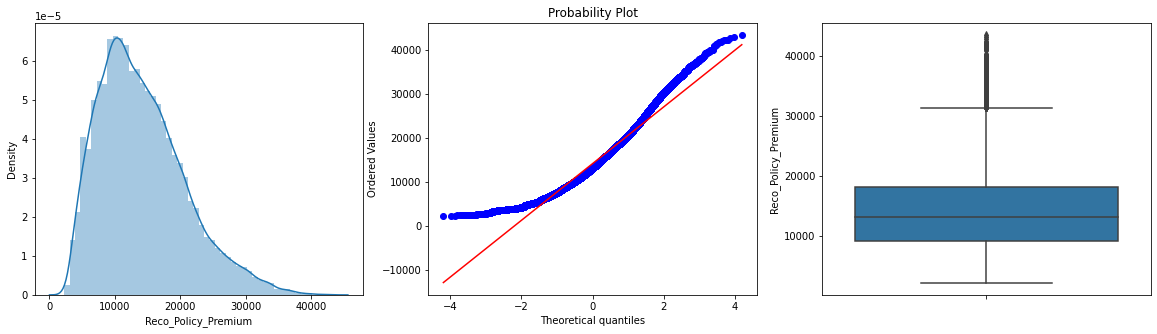

In [24]:
masterplot(data,'Reco_Policy_Premium')

C:\Users\KIIT\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


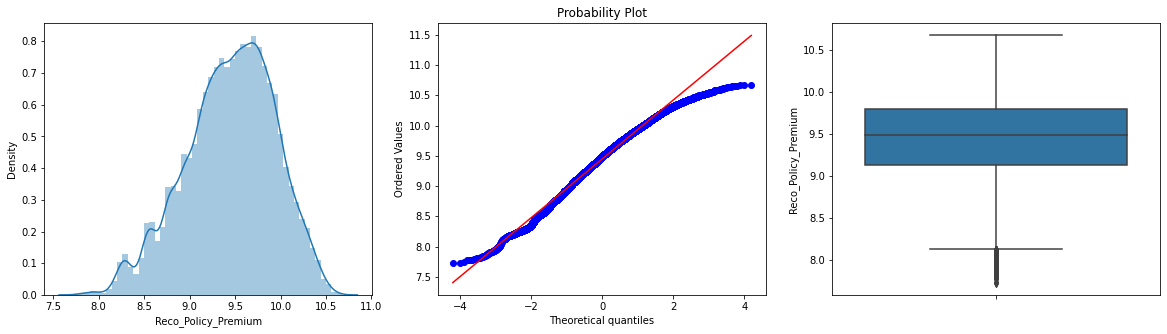

In [25]:
log_master(data,'Reco_Policy_Premium')

C:\Users\KIIT\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


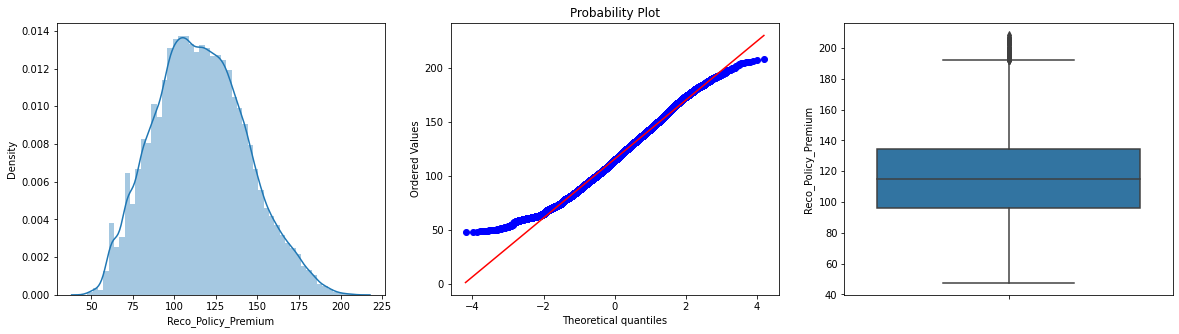

In [26]:
squareroot_master(data,'Reco_Policy_Premium')

In [27]:
#scaling the Policy Premium with sqrt to deal with outliers and skewness

data['Reco_Policy_Premium'] = np.sqrt(data['Reco_Policy_Premium'])

In [28]:
#Feature Engineering

In [29]:
data['Own_Acc_Individual'] = data['Accomodation_Type']+data['Reco_Insurance_Type']
data['Own_Acc_Individual'] = data['Own_Acc_Individual'].apply(lambda x: 1 if x=='OwnedIndividual' else 0)

In [33]:
data['Type_Joint_Wife'] = data['Reco_Insurance_Type'] + data['Is_Spouse']
data['Type_Joint_Wife'] = data['Type_Joint_Wife'].apply(lambda x: 1 if x=='JointYes' else 0)

In [ ]:
#Working on Categorical variables

In [34]:
data['Holding_Policy_Duration']=data['Holding_Policy_Duration'].apply(lambda x: 15 if x=='14+' else int(x[:-2]))

data['Accomodation_Type_Owned'] = data['Accomodation_Type'].apply(lambda x: 1 if x=="owned" else 0)

data['Reco_Insurance_Type_Joint'] = data['Reco_Insurance_Type'].apply(lambda x: 1 if x=='Joint' else 0)

data['Is_Spouse'] = data['Is_Spouse'].apply(lambda x: 1 if x=='Yes' else 0)

data['Holding_Policy_Type']=data['Holding_Policy_Type'].astype(int)
data['Holding_Policy_Type']=data['Holding_Policy_Type'].astype(str)
data = pd.get_dummies(data=data,columns=['Holding_Policy_Type'])

data['City_Code'] = data['City_Code'].apply(lambda x : int(x[1:]))

In [35]:
rem_col = ['ID','Region_Code','Lower_Age','Health Indicator','Reco_Policy_Cat','Accomodation_Type','Reco_Insurance_Type']
data.drop(columns=rem_col, inplace=True)

In [37]:
#Feature Scaling for numeric datas

In [38]:
numeric = ['Upper_Age','Reco_Policy_Premium']
categorical = list(data.columns)
for i in numeric:
    categorical.remove(i)
scaler = StandardScaler()
data_numeric_std = pd.DataFrame(data=scaler.fit_transform(data[numeric]), columns=numeric)
data_std = pd.merge(data_numeric_std, data[categorical], left_index=True, right_index=True)

In [39]:
data_std.head(10)

,Upper_Age,Reco_Policy_Premium,City_Code,Is_Spouse,Holding_Policy_Duration,Response,Own_Acc_Individual,Type_Joint_Wife,Accomodation_Type_Owned,Reco_Insurance_Type_Joint,Holding_Policy_Type_0,Holding_Policy_Type_1,Holding_Policy_Type_2,Holding_Policy_Type_3,Holding_Policy_Type_4
0,-0.511625,-0.294500,3,0,15,0,0,0,0,0,0,0,0,1,0
1,1.741395,2.144986,5,0,0,0,0,0,0,1,1,0,0,0,0
2,-0.742704,-1.079942,5,0,1,1,1,0,0,0,0,1,0,0,0
3,0.412691,0.636521,24,0,15,0,0,0,0,1,0,0,0,1,0
4,-0.049467,-0.507404,8,0,3,0,0,0,0,0,0,1,0,0,0
5,0.412691,0.279051,9,0,5,1,0,0,0,0,0,1,0,0,0
6,-0.973783,-0.465417,3,0,0,0,1,0,0,0,1,0,0,0,0
7,1.741395,2.021978,1,1,9,1,0,1,0,1,0,0,0,0,1
8,0.412691,1.798438,15,0,14,0,0,0,0,1,0,0,0,1,0
9,0.817079,1.071565,1,1,7,1,0,1,0,1,0,0,0,0,1


In [40]:
X = data_std.drop(columns='Response')

In [41]:
y = data_std['Response']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38161, 14) (12721, 14) (38161,) (12721,)


In [44]:
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train,y_train)
y_pred = rfclassifier.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.5025379561934975


In [45]:
xgclassifier = XGBClassifier()
xgclassifier.fit(X_train,y_train)
y_pred = xgclassifier.predict(X_test)
print(roc_auc_score(y_pred,y_test))

C:\Users\KIIT\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5408108353317063


In [82]:
#importing the testing data

test = pd.read_csv('./test.csv')
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [83]:
def preprocess(data):
    data['Holding_Policy_Duration'].fillna("0.0", inplace=True)
    data['Holding_Policy_Type'].fillna(0, inplace=True)

    data['Reco_Policy_Premium'] = np.sqrt(data['Reco_Policy_Premium'])

    data['Own_Acc_Individual'] = data['Accomodation_Type']+data['Reco_Insurance_Type']
    data['Own_Acc_Individual'] = data['Own_Acc_Individual'].apply(lambda x: 1 if x=='OwnedIndividual' else 0)

    data['Type_Joint_Wife'] = data['Reco_Insurance_Type'] + data['Is_Spouse']
    data['Type_Joint_Wife'] = data['Type_Joint_Wife'].apply(lambda x: 1 if x=='JointYes' else 0)

    data['Holding_Policy_Duration']=data['Holding_Policy_Duration'].apply(lambda x: 15 if x=='14+' else int(x[:-2]))

    data['Accomodation_Type_Owned'] = data['Accomodation_Type'].apply(lambda x: 1 if x=="owned" else 0)

    data['Reco_Insurance_Type_Joint'] = data['Reco_Insurance_Type'].apply(lambda x: 1 if x=='Joint' else 0)

    data['Is_Spouse'] = data['Is_Spouse'].apply(lambda x: 1 if x=='Yes' else 0)

    data['Holding_Policy_Type']=data['Holding_Policy_Type'].astype(int)
    data['Holding_Policy_Type']=data['Holding_Policy_Type'].astype(str)
    data = pd.get_dummies(data=data,columns=['Holding_Policy_Type'])

    data['City_Code'] = data['City_Code'].apply(lambda x : int(x[1:]))

    rem_col = ['ID','Region_Code','Lower_Age','Health Indicator','Reco_Policy_Cat','Accomodation_Type','Reco_Insurance_Type']
    data.drop(columns=rem_col, inplace=True)

    numeric = ['Upper_Age','Reco_Policy_Premium']
    categorical = list(data.columns)
    for i in numeric:
        categorical.remove(i)
    scaler = StandardScaler()
    data_numeric_std = pd.DataFrame(data=scaler.fit_transform(data[numeric]), columns=numeric)
    data_std = pd.merge(data_numeric_std, data[categorical], left_index=True, right_index=True)
    
    
    return data_std 

In [84]:
test_processed = preprocess(test)

In [85]:
test_processed.head(10)

,Upper_Age,Reco_Policy_Premium,City_Code,Is_Spouse,Holding_Policy_Duration,Own_Acc_Individual,Type_Joint_Wife,Accomodation_Type_Owned,Reco_Insurance_Type_Joint,Holding_Policy_Type_0,Holding_Policy_Type_1,Holding_Policy_Type_2,Holding_Policy_Type_3,Holding_Policy_Type_4
0,-0.862252,-0.254936,1,0,6,1,0,0,0,0,0,0,1,0
1,1.398027,2.340467,4,1,3,0,1,0,1,0,0,0,1,0
2,-0.978164,-0.739828,1,0,2,0,0,0,0,0,0,0,0,1
3,-1.267943,-0.769562,3,0,3,0,0,0,0,0,0,0,1,0
4,1.745763,1.255804,1,0,0,1,0,0,0,1,0,0,0,0
5,-1.209988,-1.394203,1,0,0,0,0,0,0,1,0,0,0,0
6,0.644601,0.822491,2,0,15,1,0,0,0,0,0,0,0,1
7,-0.224738,-0.410185,13,0,0,0,0,0,0,1,0,0,0,0
8,-1.325899,-0.454424,18,0,0,1,0,0,0,1,0,0,0,0
9,-0.224738,0.517222,3,1,6,0,1,0,1,0,1,0,0,0


In [86]:
y_test_pred = xgclassifier.predict(test_processed)

In [87]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred = pd.concat([test['ID'],y_test_pred],axis=1)
y_test_pred.columns = ['ID','Response']
y_test_pred.head(10)

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
5,50888,0
6,50889,0
7,50890,0
8,50891,0
9,50892,0


In [89]:
y_test_pred.to_csv('./predicted_solution.csv',index=False)